<a href="https://colab.research.google.com/github/Amir-Entezari/Clustring-dataset-project/blob/main/Clustring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as pltplot
import seaborn as sb
from sklearn.cluster import KMeans,DBSCAN
from fcmeans import FCM

# قسمت اول

ابتدا هر سه دادگان موجود را لود میکنیم.

In [ ]:
dataSet_1=pd.read_csv('first_clustering_dataset.csv')
dataSet_2=pd.read_csv('second_clustering_dataset.csv')
dataSet_3=pd.read_csv('third_clustering_dataset.csv')

In [ ]:
#dataSet_1.insert(2, column = "label", value = "point") 
#dataSet_1.drop('label', inplace=True, axis=1)
dataSet_1

,c1,c2
0,-0.125391,-1.268829
1,0.062522,1.278778
2,-0.048762,0.200549
3,0.105585,-0.496629
4,0.011886,-0.739317
...,...,...
395,0.248226,-1.088287
396,0.205768,-0.421411
397,0.269167,0.695011
398,0.211597,0.977275


In [ ]:
#dataSet_2.insert(2, column = "label", value = "point") 
#dataSet_2.drop('label', inplace=True, axis=1)
dataSet_2

,c1,c2
0,1.047961,0.357217
1,0.201221,0.295197
2,0.163506,-1.846756
3,0.876857,1.499314
4,1.389838,0.092843
...,...,...
445,12.353425,21.892071
446,12.398762,21.301938
447,12.713268,19.627323
448,13.503682,20.372600


In [ ]:
#dataSet_3.insert(2, column = "label", value = "point") 
#dataSet_3.drop('label', inplace=True, axis=1)
dataSet_3

,c1,c2
0,0.315715,0.230080
1,-0.420268,0.609144
2,0.102944,-1.117928
3,-0.105657,-0.112488
4,-0.674778,0.130790
...,...,...
495,1.618047,2.610644
496,1.997595,1.888732
497,2.870525,1.726396
498,1.760763,2.430575


بعد از لود کردن هر سه دادگان حال نمودار دو بعدی هر یک را با استفاده از تابع اسکتر پلات رسم میکنیم.

<AxesSubplot:xlabel='c1', ylabel='c2'>

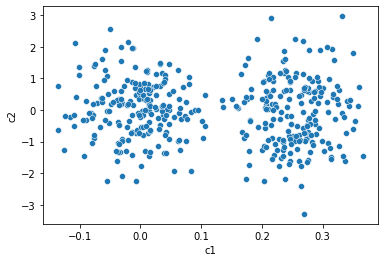

In [ ]:
sb.scatterplot(data=dataSet_1, x='c1',y='c2')

.

In [ ]:
lsA =[]
sumA = dataSet_1["c1"].sum()
avgA=sumA/401
disA= (max(dataSet_1["c1"]) - min(dataSet_1["c1"]) )
for x in dataSet_1["c1"]:
    lsA.append((x-avgA)*6)
lsB =[]
sumB = dataSet_1["c2"].sum()
avgB=sumB/401
disB= (max(dataSet_1["c2"]) - min(dataSet_1["c2"]) )
for x in dataSet_1["c2"]:
    lsB.append((x-avgB)*disA)
lsB
dataSet_1["c1"]=lsA
dataSet_1["c2"]=lsB
dataSet_1_copy = dataSet_1

<AxesSubplot:xlabel='c1', ylabel='c2'>

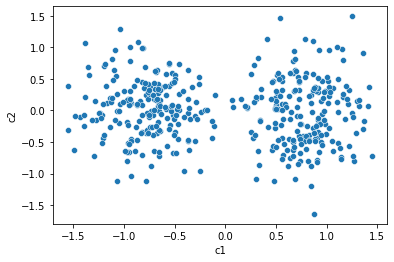

In [ ]:
sb.scatterplot(data=dataSet_1, x='c1',y='c2')

<AxesSubplot:xlabel='c1', ylabel='c2'>

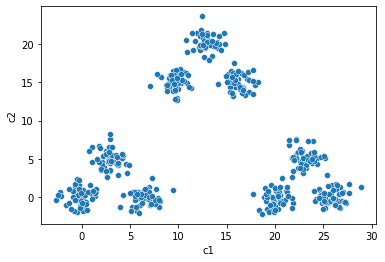

In [ ]:
sb.scatterplot(data=dataSet_2, x='c1',y='c2')

<AxesSubplot:xlabel='c1', ylabel='c2'>

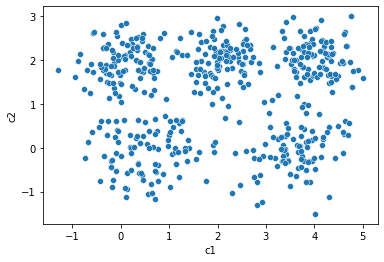

In [ ]:
sb.scatterplot(data=dataSet_3, x='c1',y='c2')

پس از رسم نمودار دو بعدی با استفاده از تعریف چگالی یادنسیتی بررسی میکنیم که تعداد خوشه هرکدام از دادگان چند است. در نمودار یک مشاهده میکنیم که نقاط درون نمودار در دو  ناحیه بزرگ جمع شده و تراکم دارند از این رو تعداد کلاستر های این نمودار برابر با ۲ است.
در نمودار دوم نیز ملاحظه میکنیم که نقاط داده ها ابتدا در سه ناحیه بزرگ تراکم داشته و اگر دقیق تر شویم در هرکدام از این ناحیه ها میبینیم که نقاط در سه ناحیه کوچکتر متمرکز شده اند از این رو تعداد کلاستر ها درون دیتاست دوم برابر ۹ می باشد.
در نمودار سوم نیز مشاهده میکنیم که داده ها در پنج ناحیه که سه تای آن ها تراکم بیشتری دارند جمع شده اند. از این رو تعداد کلاستر های دادگان سوم برابر ۵ است.

# قسمت دوم

حال با استفاده از الگوریتم گفته شده در قسمت دوم سوال تمامی مراکز را از مجموعه داده هاانتخاب میکنیم و پس از پیدا کردن آن ها را به دیتا ست اصلی اضافه میکنیم و با استفاده از تابع اسکترپلات آن ها را نمایش میدهیم.
در این قسمت ابتدا مراکز را پیدا میکنیم سپس آن ها را درون یک آرایه ذخیره میکنیم در مرحله بعدی به تمام نقاط داده ها یک برچسب پوینت به صورت دیفالت میدهیم. سپس مشخص میکنیم که هر یک از داده ها متعلق به کدام کلاستر بوده و برچسب آن ها را به کلاستر مربوطه تغییر میدهیم. برچسب نقاط مراکز را نیز به سنتروید تغییر میدهیم.

In [ ]:
df1_kmeans = KMeans(n_clusters=2, random_state=0).fit(dataSet_1)
data1_centroid=df1_kmeans.cluster_centers_
temp_df = pd.DataFrame(data1_centroid , columns =['c1', 'c2'])
temp_df


,c1,c2
0,-0.777152,0.030417
1,0.773118,-0.030144


In [ ]:
dataSet_1 = dataSet_1.append(temp_df , ignore_index=True)
df1_labeled = dataSet_1
df1_labeled.insert(2, column = "label", value = "point")
for i in range(len(df1_labeled)-len(temp_df)):
    df1_labeled.loc[i, 'label'] = 'cluster'+str(df1_kmeans.labels_[i])
for i in range(len(temp_df)):
    df1_labeled.loc[len(df1_labeled)-i-1, 'label'] = 'centroid'
df1_labeled

/tmp/ipykernel_4472/3167532524.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataSet_1 = dataSet_1.append(temp_df , ignore_index=True)


,c1,c2,label
0,-1.495801,-0.629648,cluster0
1,-0.368325,0.646714,cluster0
2,-1.036031,0.106516,cluster0
3,-0.109944,-0.242773,cluster0
4,-0.672140,-0.364360,cluster0
...,...,...,...
397,0.871545,0.354244,cluster1
398,0.526124,0.495659,cluster1
399,0.826822,-0.491922,cluster1
400,-0.777152,0.030417,centroid


حال اس اس ای خواسته شده را چاپ میکنیم:

In [ ]:
print("SSE is:",df1_kmeans.inertia_)

SSE is: 135.18282550773466


<AxesSubplot:xlabel='c1', ylabel='c2'>

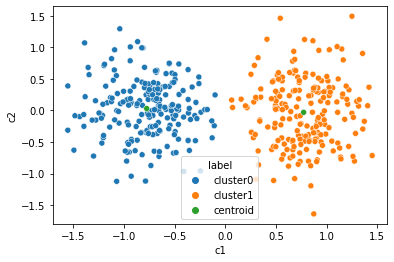

In [ ]:
sb.scatterplot(data=df1_labeled, x='c1',y='c2',hue='label')

In [ ]:
df2_kmeans = KMeans(n_clusters=9, random_state=0).fit(dataSet_2)
df2_centroid=df2_kmeans.cluster_centers_
temp_df = pd.DataFrame(df2_centroid , columns =['c1', 'c2'])
temp_df

,c1,c2
0,20.027387,-0.222846
1,9.658355,15.088268
2,6.471611,-0.127806
3,12.909642,20.214240
4,23.068098,5.155036
5,2.849890,4.942425
6,25.819140,0.046736
7,16.135079,15.143695
8,-0.230911,0.029350


In [ ]:
dataSet_2 = dataSet_2.append(temp_df , ignore_index=True)
df2_labeled = dataSet_2
df2_labeled.insert(2, column = "label", value = "point")
for i in range(len(df2_labeled)-len(temp_df)):
    df2_labeled.loc[i, 'label'] = 'cluster'+str(df2_kmeans.labels_[i])
for i in range(len(temp_df)):
    df2_labeled.loc[len(df2_labeled)-i-1, 'label'] = 'centroid'
df2_labeled

/tmp/ipykernel_4472/2542754448.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataSet_2 = dataSet_2.append(temp_df , ignore_index=True)


,c1,c2,label
0,1.047961,0.357217,cluster8
1,0.201221,0.295197,cluster8
2,0.163506,-1.846756,cluster8
3,0.876857,1.499314,cluster8
4,1.389838,0.092843,cluster8
...,...,...,...
454,23.068098,5.155036,centroid
455,2.849890,4.942425,centroid
456,25.819140,0.046736,centroid
457,16.135079,15.143695,centroid


حال اس اس ای خواسته شده را چاپ میکنیم:

In [ ]:
print("SSE is:",df2_kmeans.inertia_)

SSE is: 859.393195145893


<AxesSubplot:xlabel='c1', ylabel='c2'>

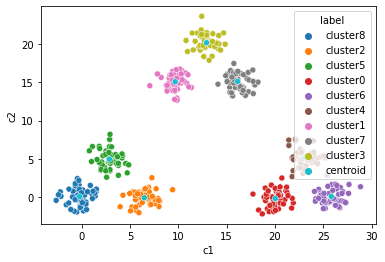

In [ ]:
sb.scatterplot(data=df2_labeled, x='c1',y='c2',hue='label')

In [ ]:
df3_kmeans = KMeans(n_clusters=5, random_state=0).fit(dataSet_3)
df3_centroid=df3_kmeans.cluster_centers_
temp_df = pd.DataFrame(df3_centroid , columns =['c1', 'c2'])
temp_df

,c1,c2
0,0.559909,-0.091828
1,4.021965,2.038193
2,0.071901,1.956804
3,3.579982,-0.061400
4,2.071103,1.995244


In [ ]:
dataSet_3 = dataSet_3.append(temp_df , ignore_index=True)
df3_labeled=dataSet_3
df3_labeled.insert(2, column = "label", value = "point")
for i in range(len(df3_labeled)-len(temp_df)):
    df3_labeled.loc[i, 'label'] = 'cluster'+str(df3_kmeans.labels_[i])
for i in range(len(temp_df)):
    df3_labeled.loc[len(df3_labeled)-i-1, 'label'] = 'centroid'
df3_labeled

/tmp/ipykernel_4472/949846335.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataSet_3 = dataSet_3.append(temp_df , ignore_index=True)


,c1,c2,label
0,0.315715,0.230080,cluster0
1,-0.420268,0.609144,cluster0
2,0.102944,-1.117928,cluster0
3,-0.105657,-0.112488,cluster0
4,-0.674778,0.130790,cluster0
...,...,...,...
500,0.559909,-0.091828,centroid
501,4.021965,2.038193,centroid
502,0.071901,1.956804,centroid
503,3.579982,-0.061400,centroid


حال اس اس ای خواسته شده را چاپ میکنیم:

In [ ]:
print("SSE is:",df3_kmeans.inertia_)

SSE is: 222.3659877600173


<AxesSubplot:xlabel='c1', ylabel='c2'>

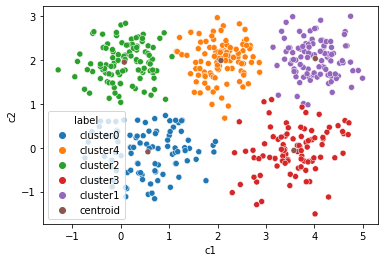

In [ ]:
sb.scatterplot(data=df3_labeled, x='c1',y='c2',hue='label')

حال به محاسبه اس اس ای میپردازیم.

# قسمت سوم

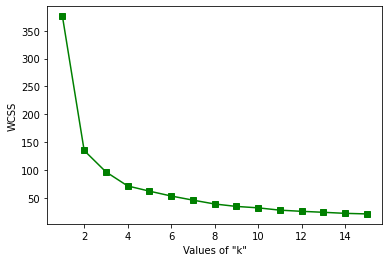

In [ ]:
# determining the maximum number of clustersn using the simple method
#dataSet_1=pd.read_csv('first_clustering_dataset.csv')
wcss = {}
for k in range(1,15+1):
    model = KMeans(n_clusters=k, random_state=0, max_iter=200).fit(dataSet_1_copy)
    wcss[k] = model.inertia_
# plotting the wcss values to find out the elbow value
pltplot.plot(wcss.keys(), wcss.values(), 'gs-')
pltplot.xlabel('Values of "k"')
pltplot.ylabel('WCSS')
pltplot.show()

در نمودار خطای رسم شده مشاهده میکنیم که نقطه زانویی برای این دیتاست میتواند ۲ یا ۳ باشد یعنی ۲ یا ۳ کلاستر. پس تعدادی که در ابتدا انتخاب کردیم نیز درست بود.

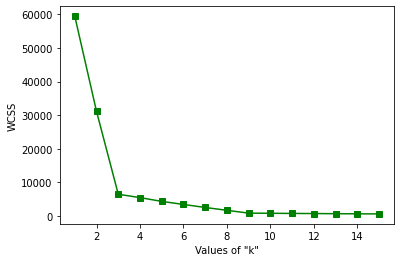

In [ ]:
# determining the maximum number of clustersn using the simple method
dataSet_2=pd.read_csv('second_clustering_dataset.csv')
wcss = {}
for k in range(1,15+1):
    model = KMeans(n_clusters=k, random_state=0, max_iter=200).fit(dataSet_2)
    wcss[k] = model.inertia_
# plotting the wcss values to find out the elbow value
pltplot.plot(wcss.keys(), wcss.values(), 'gs-')
pltplot.xlabel('Values of "k"')
pltplot.ylabel('WCSS')
pltplot.show()

در نمودار خطای رسم شده مشاهده میکنیم که اگر بخواهیم به طور کلی نقطه زانویی را انتخاب کنیم برابر می شود با ۳ واگر بخواهیم دقت بیشتری به خرج دهیم مبینیم که عدد ۹ نیز انتخاب مناسبی است چرا که بعد از آن نیز میزان خطا ثابت میشود.

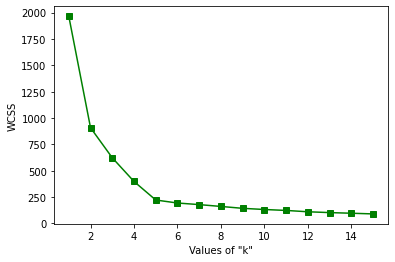

In [ ]:
# determining the maximum number of clustersn using the simple method
dataSet_3=pd.read_csv('third_clustering_dataset.csv')
wcss = {}
for k in range(1,15+1):
    model = KMeans(n_clusters=k, random_state=0, max_iter=200).fit(dataSet_3)
    wcss[k] = model.inertia_
# plotting the wcss values to find out the elbow value
pltplot.plot(wcss.keys(), wcss.values(), 'gs-')
pltplot.xlabel('Values of "k"')
pltplot.ylabel('WCSS')
pltplot.show()

در این نمودار رسم مشاهده میکنیم که نقطه زانویی به وضوح عدد ۵ می باشد یعنی ۵ کلاستری که در ابتدا انتخاب کردیم درست بود.

# قسمت چهارم

## Fuzzy c means

In [ ]:
X = np.array(dataSet_1_copy)
my_model = FCM(n_clusters = 2) # we use two cluster as an example
my_model.fit(X) ## X, numpy array. rows:samples columns:features
centers = my_model.centers
labels = my_model.predict(X)


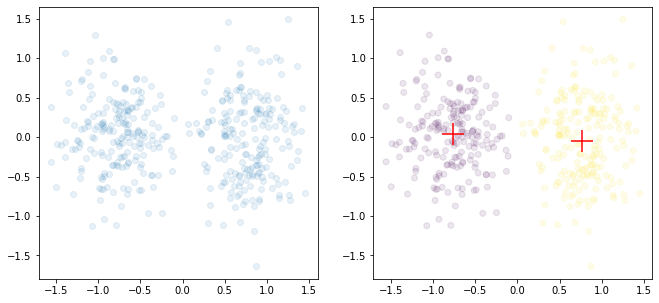

In [ ]:
# plot result
f, axes = pltplot.subplots(1, 2, figsize=(11,5))
axes[0].scatter(X[:,0], X[:,1], alpha=.1)
axes[1].scatter(X[:,0], X[:,1], c=labels, alpha=.1)
axes[1].scatter(centers[:,0], centers[:,1], marker="+", s=500, c='r')
pltplot.show()

In [ ]:
X = np.array(dataSet_2)
my_model = FCM(n_clusters = 9) # we use two cluster as an example
my_model.fit(X) ## X, numpy array. rows:samples columns:features
centers = my_model.centers
labels = my_model.predict(X)


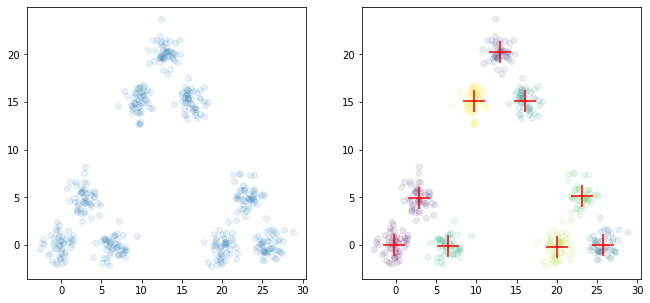

In [ ]:
# plot result
f, axes = pltplot.subplots(1, 2, figsize=(11,5))
axes[0].scatter(X[:,0], X[:,1], alpha=.1)
axes[1].scatter(X[:,0], X[:,1], c=labels, alpha=.1)
axes[1].scatter(centers[:,0], centers[:,1], marker="+", s=500, c='r')
pltplot.show()

In [ ]:
X = np.array(dataSet_3)
my_model = FCM(n_clusters = 5) # we use two cluster as an example
my_model.fit(X) ## X, numpy array. rows:samples columns:features
centers = my_model.centers
labels = my_model.predict(X)

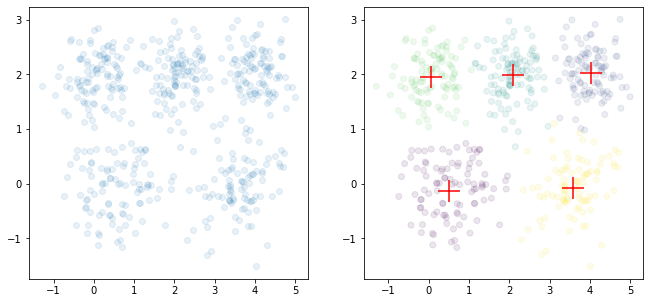

In [ ]:
# plot result
f, axes = pltplot.subplots(1, 2, figsize=(11,5))
axes[0].scatter(X[:,0], X[:,1], alpha=.1)
axes[1].scatter(X[:,0], X[:,1], c=labels, alpha=.1)
axes[1].scatter(centers[:,0], centers[:,1], marker="+", s=500, c='r')
pltplot.show()

## DBSCAN

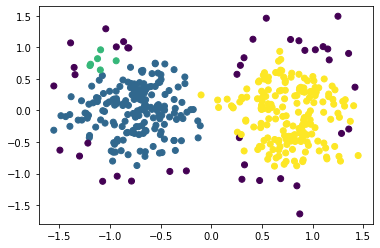

In [ ]:
from sklearn.cluster import DBSCAN
X = np.array(dataSet_1_copy)
dbscan = DBSCAN(eps = 0.2, min_samples = 6).fit(X)
labels = dbscan.labels_
pltplot.scatter(X[:, 0], X[:,1], c = labels)
pltplot.show()

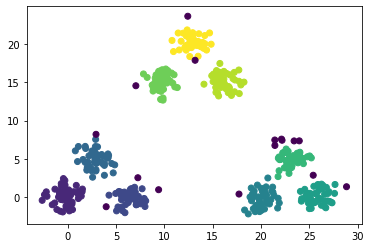

In [ ]:

X = np.array(dataSet_2)
dbscan = DBSCAN(eps = 1.2, min_samples = 6).fit(X)
labels = dbscan.labels_
pltplot.scatter(X[:, 0], X[:,1], c = labels)
pltplot.show()

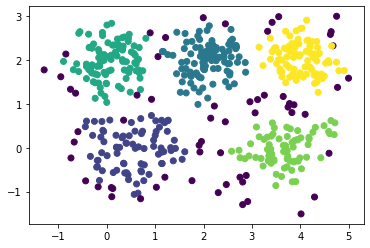

In [ ]:

X = np.array(dataSet_3)
dbscan = DBSCAN(eps = 0.3, min_samples = 6).fit(X)
labels = dbscan.labels_
pltplot.scatter(X[:, 0], X[:,1], c = labels)
pltplot.show()

اگر بخواهیم به طور شهودی به نمودار های رسم شده توسط سه الگوریتم گفته شده را با هم مقایسه کنیم
در میابیم که بهترین الگوریتم برای سه دیتا ست داده شده الگوریتم کی مینز بهتر می باشد
 و بعد از آن نیز با اختلاف کمی الگوریتم فازی است. اما مشاهده میکنیم که در الگوریتم دی بی اسکن 
 برخی از داده های یک کلاستر بین کلاستر های دیگر قرار دارند یا مثلا در نمودار اول به جای دو کلاستر
 چهار کلاستر داریم.
  